In [1]:
from functions import *
from IPython.display import Audio, display

## Models
### Models inspired by `hvqvae_model_2023_03_05_v4.h5` (for hyperparameters and epochs)
---
### Grid:
#### $\beta\in\{0.25, 0.5, 0.75, 1, 1.25, 1.5\}$, `latent_dim`$\in\{20, 24\}$
#### with $\beta_e=0.25$:
* `latent_dim=20`:
    * $\beta=0.25$: `estm_model_2023_03_24_v10.h5`
    * $\beta=0.5$: `estm_model_2023_03_24_v11.h5`
    * $\beta=0.75$: `estm_model_2023_03_24_v12.h5`
    * $\beta=1$: `estm_model_2023_03_24_v13.h5`
    * $\beta=1.25$: `estm_model_2023_03_24_v14.h5`
    * $\beta=1.5$: `estm_model_2023_03_24_v15.h5`
* `latent_dim=24`:
    * $\beta=0.25$: `estm_model_2023_03_24_v16.h5`
    * $\beta=0.5$: `estm_model_2023_03_24_v17.h5`
    * $\beta=0.75$: `estm_model_2023_03_25_v0.h5`
    * $\beta=1$: `estm_model_2023_03_25_v1.h5`
    * $\beta=1.25$: `estm_model_2023_03_25_v2.h5`
    * $\beta=1.5$: `estm_model_2023_03_25_v3.h5`
#### with $\beta_e=0.75$:
* `latent_dim=20`:
    * $\beta=0.25$: `estm_model_2023_03_28_v0.h5`
    * $\beta=0.5$: `estm_model_2023_03_28_v1.h5`
    * $\beta=0.75$: `estm_model_2023_03_28_v2.h5`
    * $\beta=1$: `estm_model_2023_03_28_v3.h5`
    * $\beta=1.25$: `estm_model_2023_03_29_v0.h5`
    * $\beta=1.5$: `estm_model_2023_03_29_v1.h5`
* `latent_dim=24`:
    * $\beta=0.25$: `estm_model_2023_03_29_v2.h5`
    * $\beta=0.5$: `estm_model_2023_03_29_v3.h5`
    * $\beta=0.75$: `estm_model_2023_03_29_v4.h5`
    * $\beta=1$: `estm_model_2023_03_29_v5.h5`
    * $\beta=1.25$: `estm_model_2023_03_29_v6.h5`
    * $\beta=1.5$: `estm_model_2023_03_29_v7.h5`
#### with $\beta_e=1.25$:
* `latent_dim=20`:
    * $\beta=0.25$: `estm_model_2023_03_29_v8.h5`
    * $\beta=0.5$: `estm_model_2023_03_29_v9.h5`
    * $\beta=0.75$: `estm_model_2023_03_29_v10.h5`
    * $\beta=1$: `estm_model_2023_03_29_v11.h5`
    * $\beta=1.25$: `estm_model_2023_03_29_v12.h5`
    * $\beta=1.5$: `estm_model_2023_03_29_v13.h5`
* `latent_dim=24`:
    * $\beta=0.25$: `estm_model_2023_03_29_v14.h5`
    * $\beta=0.5$: `estm_model_2023_03_29_v15.h5`
    * $\beta=0.75$: `estm_model_2023_03_29_v16.h5`
    * $\beta=1$: `estm_model_2023_03_29_v17.h5`
    * $\beta=1.25$: `estm_model_2023_03_29_v18.h5`
    * $\beta=1.5$: `estm_model_2023_03_29_v19.h5`


*Note: models above use old architecture; new models are in `estm_v2_grid` folder where the model name specifies the model parameters*

In [2]:
n_segs  = 10095
seg_len = 222264

In [3]:
df = pd.read_csv('data\\deam_split.csv')
songs = df['song_id']
test = df['test']
val = df['validation']
qs = df[['Q1', 'Q2', 'Q3', 'Q4']].to_numpy()

In [4]:
df = pd.read_csv('data\\deam_predictions.csv')
df = df.set_index('song_id')

In [5]:
train_df = pd.read_csv('data/estm_train_exp.csv')
test_df = pd.read_csv('data/estm_test_exp.csv')

In [6]:
max_pct_zero = 0.5
use_argmax = True

In [7]:
X_train = np.zeros((train_df.shape[0], seg_len, 1))
dev_train = np.zeros(train_df.shape[0], dtype=bool)
X_test = np.zeros((test_df.shape[0], seg_len, 1))
dev_test = np.zeros(test_df.shape[0], dtype=bool)

Y_train = np.zeros((train_df.shape[0], seg_len, 1))
Y_test = np.zeros((test_df.shape[0], seg_len, 1))

S_train = np.zeros((train_df.shape[0], 2, 4))
S_test = np.zeros((test_df.shape[0], 2, 4))

id_train = []
id_test  = []

In [ ]:
for j, i in enumerate(train_df.index):
    content, style, dev = train_df.loc[i]
    dev_train[j] = dev
    song_id = int(style.split('-')[0])
    content = f'data/DEAM_standard_10s/{content}'
    style_audio = f'data/DEAM_standard_10s/{style}'
    style = f'data\\DEAM_standard_10s\\{style}'
    seg, sr = lb.load(content)
    X_train[j, :, 0] = seg
    seg, sr = lb.load(style_audio)
    Y_train[j, :, 0] = seg
    style_embed = df.loc[style].to_numpy()
    if use_argmax:
        temp = np.zeros(4)
        temp[np.argmax(style_embed)] = 1
        style_embed = temp
    S_train[j, 0, :] = style_embed # predicted
    S_train[j, 1, :] = true_df.loc[song_id].to_numpy() # true
    
for j, i in enumerate(test_df.index):
    content, style, dev = test_df.loc[i]
    dev_test[j] = dev
    song_id = int(style.split('-')[0])
    content = f'data/DEAM_standard_10s/{content}'
    style_audio = f'data/DEAM_standard_10s/{style}'
    style = f'data\\DEAM_standard_10s\\{style}'
    seg, sr = lb.load(content)
    X_test[j, :, 0] = seg
    seg, sr = lb.load(style_audio)
    Y_test[j, :, 0] = seg
    style_embed = df.loc[style].to_numpy()
    if use_argmax:
        temp = np.zeros(4)
        temp[np.argmax(style_embed)] = 1
        style_embed = temp
    S_test[j, 0, :] = style_embed # predicted
    S_test[j, 1, :] = true_df.loc[song_id].to_numpy() # true

## Old method

In [5]:
# max_pct_zero = 0.5
# paths = [f'data\\DEAM_standard_10s\\{song}-*.wav' for song in songs]
# use_argmax = True

# X_train = np.zeros((n_segs, seg_len, 1))
# X_test  = np.zeros((n_segs, seg_len, 1))

# Y_train = np.zeros((train_df.shape[0], seg_len, 1))
# Y_test = np.zeros((test_df.shape[0], seg_len, 1))

# S_train = np.zeros((n_segs, 2, 4))
# S_test  = np.zeros((n_segs, 2, 4))

# id_train = []
# id_test  = []

# j_train = 0; j_test = 0
# for i in tqdm(range(len(paths))):
#     files = glob(paths[i])
#     for file in files:
#         seg, sr = lb.load(file)
#         n = seg.shape[0]
#         if (seg == 0).sum()/n <= max_pct_zero:
#             if test[i] == 1:
#                 X_test[j_test, :, 0] = seg
#                 style_embed = df.loc[style].to_numpy()
#                 if use_argmax:
#                     temp = np.zeros(4)
#                     temp[np.argmax(style_embed)] = 1
#                     style_embed = temp
#                 seg, sr = lb.load(style_audio)
#                 Y_test[j, :, 0] = seg
#                 S_test[j_test, 0, :] = style_embed # predicted
#                 S_test[j_test, 1, :] = qs[i, :] # true
#                 id_test.append(file)
#                 j_test += 1
#             else:
#                 X_train[j_train, :, 0] = seg
#                 style_embed = df.loc[style].to_numpy()
#                 if use_argmax:
#                     temp = np.zeros(4)
#                     temp[np.argmax(style_embed)] = 1
#                     style_embed = temp
#                 seg, sr = lb.load(style_audio)
#                 Y_train[j, :, 0] = seg
#                 S_train[j_train, 0, :] = style_embed # predicted
#                 S_train[j_train, 1, :] = qs[i, :] # true
#                 id_train.append(file)
#                 j_train += 1
# X_train = X_train[:j_train, :, :]
# X_test  = X_test[:j_test, :, :]

# S_train = S_train[:j_train, :, :]
# S_test  = S_test[:j_test, :, :]

# id_train = np.array(id_train)[:j_train]
# id_test  = np.array(id_test)[:j_test]

  0%|          | 0/1802 [00:00<?, ?it/s]

## New methods

In [10]:
X_train.shape, X_test.shape

NameError: name 'X_train' is not defined

In [ ]:
Y_train.shape, Y_test.shape

In [7]:
S_train.shape, S_test.shape

((6680, 2, 4), (1645, 2, 4))

In [7]:
lrelu = keras.layers.LeakyReLU(alpha=0.01)

In [8]:
def get_encoder(latent_dim):
    encoder_inputs = keras.Input(shape=(seg_len, 1))
    level_rate = [3, 5, 7]
    levels = []
    for rate in level_rate:
        level = encoder_inputs
        for i in range(rate):
            level = Conv1D(
                latent_dim, 
                3, 
                strides=2, 
                activation=lrelu
            )(level)
        levels.append(level)
    return keras.Model(encoder_inputs, levels, name='encoder')

In [9]:
def get_decoder(latent_dim):
    intermediate_steps = 27782
    intermediate_ch = int(3*latent_dim/2)
    latent_inputs = keras.Input(shape=(intermediate_steps, intermediate_ch))
    ch = int(intermediate_ch/2)
    x = Conv1DTranspose(ch, 3, strides=2, activation=lrelu)(latent_inputs)
    ch = int(ch/2)
    x = Conv1DTranspose(ch, 3, strides=2, activation=lrelu)(x)
    decoder_outputs = Conv1DTranspose(1, 3, strides=2, activation=lrelu, output_padding=1)(x)
    return keras.Model(latent_inputs, decoder_outputs, name='decoder')

### Build VQ-VAE

In [10]:
def get_vqvae(latent_dim, num_embeddings, inference, beta=0.25, **kwargs):
    content_input = keras.Input(shape=(seg_len, 1))
    style_input = keras.Input(shape=(1, 4))
    
    encoder = get_encoder(latent_dim)
    decoder = get_decoder(latent_dim)
    vq_layers = [
        VectorQuantizer(num_embeddings, latent_dim, beta=beta, name=f'embeddings_vqvae_{i}') for i in range(3)
    ]
    
    encoder_outputs = encoder(content_input)

    bottom, middle, top = [
        vq_layer(encoder_output) for vq_layer, encoder_output in zip(vq_layers, encoder_outputs)
    ]

    intermediate = int(latent_dim/2)

    if inference:
        style_input = keras.Input(shape=(seg_len, 1))
        encoder_outputs = encoder(style_input)
        style_latents = [
            vq_layer(encoder_output) for vq_layer, encoder_output in zip(vq_layers, encoder_outputs)
        ]
        bottom_style, middle_style, top_style = [
            quantized_latents[:, :, -4:] for quantized_latents in style_latents
        ]
    else:
        bottom_style, middle_style, top_style = [
            quantized_latents[:, :, -4:] for quantized_latents in [bottom, middle, top]
        ]
    bottom_style = layers.Softmax(axis=-1)(bottom_style)
    middle_style = layers.Softmax(axis=-1)(middle_style)
    top_style = layers.Softmax(axis=-1)(top_style)
    bottom = layers.Concatenate()([bottom[:, :, :-4], bottom_style])
    middle = layers.Concatenate()([middle[:, :, :-4], middle_style])
    top = layers.Concatenate()([top[:, :, :-4], top_style])
            
    bottom = Conv1DTranspose(
        intermediate, 3, activation=lrelu, padding='same'
    )(bottom)

    middle = Conv1DTranspose(
        latent_dim - 4, 3, strides=2, activation=lrelu, output_padding=1
    )(middle)
    middle = Conv1DTranspose(
        intermediate, 3, strides=2, activation=lrelu, output_padding=1
    )(middle)

    top = Conv1DTranspose(
        latent_dim - 4, 3, strides=2, activation=lrelu
    )(top)
    top = Conv1DTranspose(
        latent_dim - 4, 3, strides=2, activation=lrelu, output_padding=1
    )(top)
    top = Conv1DTranspose(
        latent_dim - 4, 3, strides=2, activation=lrelu, output_padding=1
    )(top)
    top = Conv1DTranspose(
        intermediate, 3, strides=2, activation=lrelu, output_padding=1
    )(top)

    intermediate_latents = layers.Concatenate()([bottom, middle, top])
    reconstructions = decoder(intermediate_latents)
        
    vq_vae = keras.Model([content_input, style_input], reconstructions, name='vq_vae')
    if inference:
        vq_vae.add_loss(lambda: 0)
    else:
        names = [f'{level}_cat_crossentropy' for level in ['bottom', 'middle', 'top']]
        style_losses = [
            keras.losses.CategoricalCrossentropy(name=name)(
                tf.tile(style_input, (1, level.shape[1], 1)), 
                level
            ) for level, name in zip([bottom_style, middle_style, top_style], names)
        ]
        vq_vae.add_loss(sum(style_losses)/3)
    return vq_vae

In [11]:
train_variance = 0.04383824434697565

In [12]:
model_list = glob('estm_v2_grid/*.h5')
model_list = [
    'estm_v2_grid/estm2_1.25_20_0.5.h5'
]
for i in range(len(model_list)):
    path = model_list[i][13:]
    beta_e, latent_dim, beta = path.split('_')[-3:]
    beta_e = float(beta_e)
    latent_dim = int(latent_dim)
    beta = float(beta[:-3])
    model_list[i] = (path, latent_dim, beta, beta_e)
models = {}
for model in model_list:
    path, latent_dim, beta, beta_e = model
    trainer = ESTM2Trainer(
        train_variance, 
        get_vqvae,
        latent_dim=latent_dim,
        num_embeddings=1024,
        inference=True,
        beta=beta,
        beta_e=beta_e
    )
    trainer.build([(None, seg_len, 1), (None, seg_len, 1)])
    trainer.load_weights('estm_v2_grid/' + path)
    models[path] = trainer

### Experiments

In [13]:
train_test = 'test'
use_argmax = True
exp_df = pd.read_csv(f'data/{train_test}_qualitative_exp.csv')
num_exp = exp_df.shape[0]

In [14]:
X_exp = np.zeros((num_exp, seg_len, 1))
S_audio = np.zeros((num_exp, seg_len, 1))
S_exp = np.zeros((num_exp, 1, 4))

In [15]:
for j, i in enumerate(exp_df.index):
    content, style = exp_df.loc[i]
    content = f'data\\DEAM_standard_10s\\{content}'
    style = f'data\\DEAM_standard_10s\\{style}'
    seg, sr = lb.load(content)
    X_exp[j, :, 0] = seg
    seg, sr = lb.load(style)
    S_audio[j, :, 0] = seg
    style_embed = df.loc[style].to_numpy()
    if use_argmax:
        temp = np.zeros(4)
        temp[np.argmax(style_embed)] = 1
        style_embed = temp
    S_exp[j, 0, :] = style_embed

In [16]:
rate=22050
for j, i in enumerate(exp_df.index):
    content, style = exp_df.loc[i]
    print(f'Content: {content}')
    display(Audio(data=X_exp[j, :, 0], rate=rate))
    print(f'Style: {style}')
    display(Audio(data=S_audio[j, :, 0], rate=rate))
    for model in model_list:
        path, latent_dim, beta, beta_e = model
        print(f'{path} transformation:')
        out = models[path].predict(
            [
                X_exp[j, :, :].reshape((1, seg_len, 1)),
                S_audio[j, :, :].reshape((1, seg_len, 1))
            ],
        verbose=0)
        display(Audio(data=out[0, :, 0],rate=rate))
    print('---------------------------------------')

Content: 1981-4.wav


Style: 1874-1.wav


estm2_1.25_20_0.5.h5 transformation:


---------------------------------------
Content: 876-2.wav


Style: 902-2.wav


estm2_1.25_20_0.5.h5 transformation:


---------------------------------------
Content: 1555-4.wav


Style: 473-1.wav


estm2_1.25_20_0.5.h5 transformation:


---------------------------------------
Content: 179-0.wav


Style: 1111-4.wav


estm2_1.25_20_0.5.h5 transformation:


---------------------------------------
Content: 311-1.wav


Style: 818-3.wav


estm2_1.25_20_0.5.h5 transformation:


---------------------------------------


### Plot training history and testing results

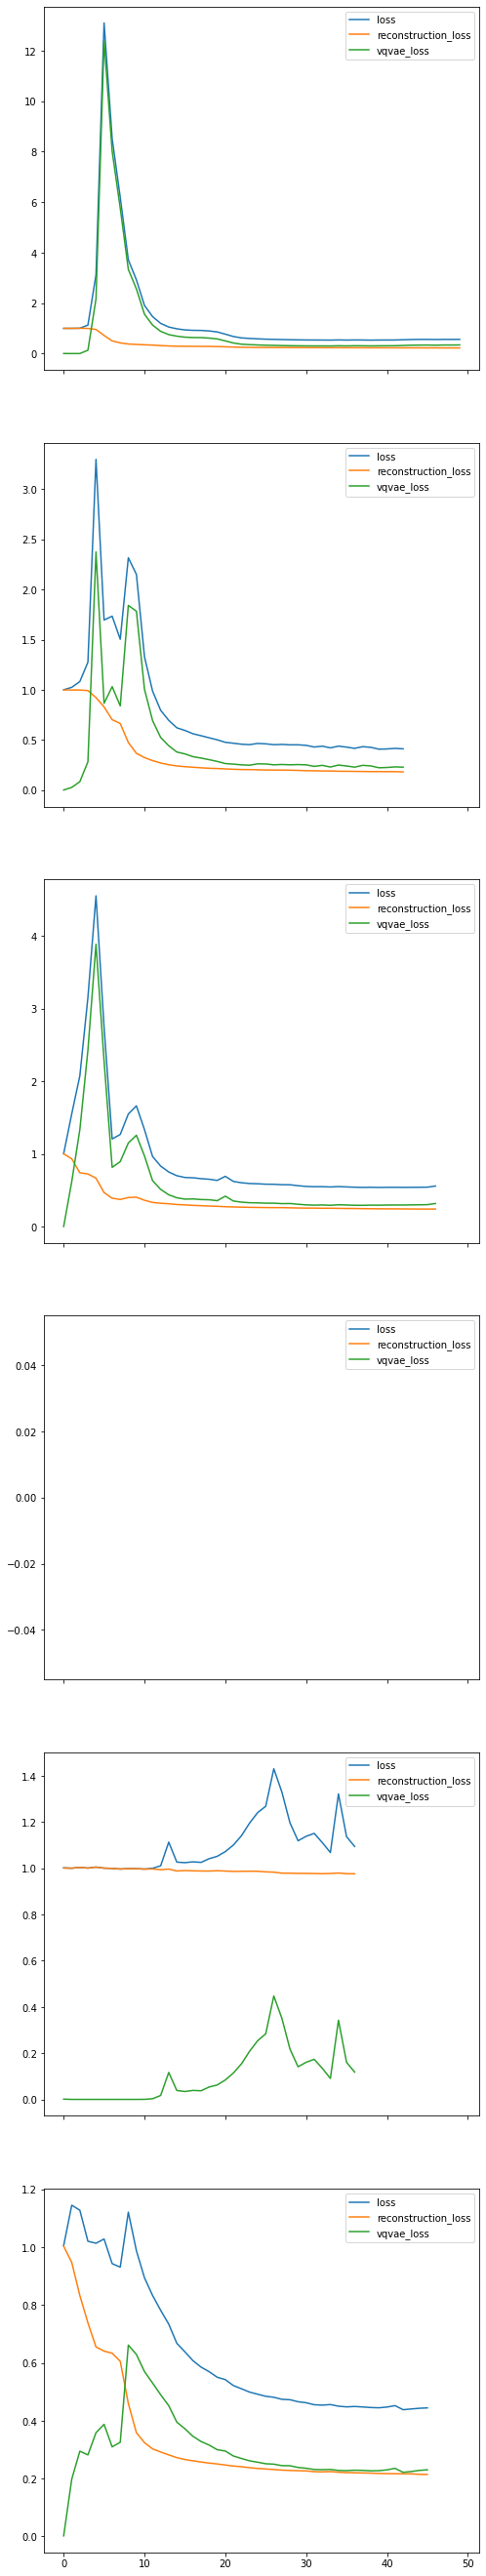

In [28]:
hist_paths = glob('estm_v2_grid/*.csv')
histories = [pd.read_csv(path) for path in hist_paths]
losses = [history.loc[:, history.columns.str.endswith('loss')] for history in histories]
fig, ax = plt.subplots(nrows=len(losses), ncols=1, sharex=True, figsize=(8, 8*len(losses)))
for i, loss in enumerate(losses):
    for col in loss.columns:
        ax[i].plot(loss.index, loss[col])
    ax[i].legend(loss.columns)
plt.show()